In [1]:
# 라이브러리 불러오기
import imp
from xml.etree.ElementInclude import include
from click import style
import numpy as np
import pandas as pd

In [2]:
# 사이킷런 불러오기
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Scaler
from sklearn import metrics

In [3]:
# 시각화 라이브러리 불러오기
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [4]:
#판다스 전체보기 옵션 설정
pd.options.display.width = None
pd.options.display.max_columns = None
pd.set_option('display.max_rows', 3000)
pd.set_option('display.max_columns', 3000)

from warnings import filterwarnings
filterwarnings(action = 'ignore')

In [5]:
#데이터 불러오기
filename = "C:/Users/Edward/Downloads/winequality-red.csv"
wine = pd.read_csv(filename)
print("Successfully Imported Data!")
print(wine.head())
print(wine.shape)

Successfully Imported Data!
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8    

In [6]:
#데이터 샬펴보기
wine.describe(include='all')

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996750   
75%       0.090000            21.000000             62.000000     0.997835   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1599.000000  1599.000000  1599.000000  1599.000000  
mean      3.311113     0.658149    10.422983     5.636023  
std       0.154386     0.169507     1.065668     0.807569  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.210000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.730000    11.100000     6.000000  
max       4.010000     2.000000    14.900000     8.000000

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


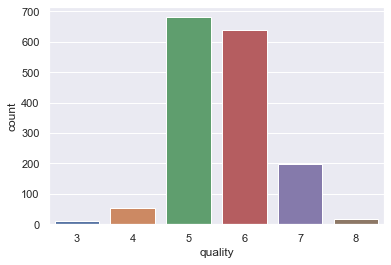

In [7]:
# 결측치 보기
print(wine.isna().sum())
wine.groupby("quality")["quality"].count()
sns.countplot(wine['quality'])
plt.show()

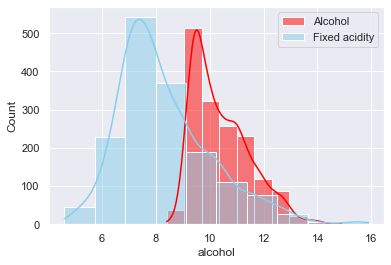

In [8]:
#Histogram
sns.set(style="darkgrid")
sns.histplot(data=wine, x="alcohol", color="red", label="Alcohol", kde=True, bins=10)
sns.histplot(data=wine, x="fixed acidity", color="skyblue", label="Fixed acidity", kde=True, bins=10)
plt.legend()
plt.show()

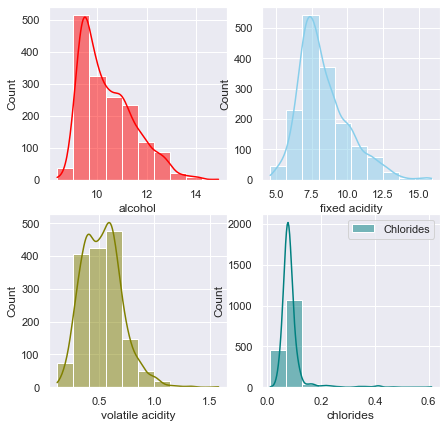

In [9]:
# Histogram matrix - alcohol, fixed acidity, volatile acidity, chlorides
fig, axs = plt.subplots(2, 2, figsize=(7, 7))
sns.set(style="darkgrid")
sns.histplot(data=wine, x="alcohol", color="red", label="Alcohol", kde=True, bins=10, ax=axs[0, 0])
sns.histplot(data=wine, x="fixed acidity", color="skyblue", label="Fixed acidity", kde=True, bins=10, ax=axs[0, 1])
sns.histplot(data=wine, x="volatile acidity", color="olive", label="Volatile acidity", kde=True, bins=10, ax=axs[1, 0])
sns.histplot(data=wine, x="chlorides", color="teal", label="Chlorides", kde=True, bins=10, ax=axs[1, 1])
plt.legend()
plt.show()

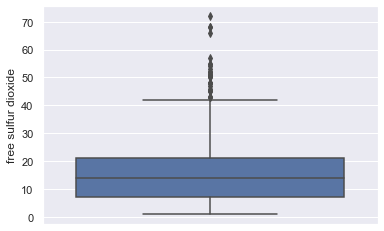

In [10]:
#Box plot
sns.boxplot(y=wine["free sulfur dioxide"])
plt.show()

        variable  value
0  fixed acidity    7.4
1  fixed acidity    7.8
2  fixed acidity    7.8
3  fixed acidity   11.2
4  fixed acidity    7.4


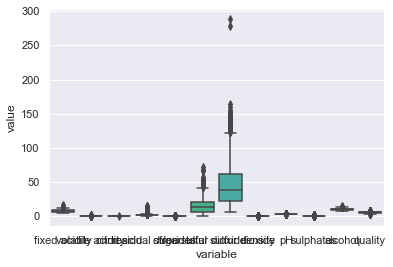

In [11]:
#Box plot - all
wine_melted = pd.melt(wine)
print(wine_melted.head())
sns.boxplot(x="variable", y="value", data=wine_melted)
plt.show()

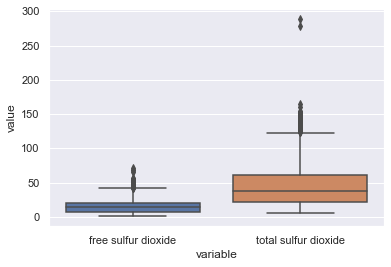

In [12]:
#Box plot - Select columns
wine_melted = pd.melt(wine[['free sulfur dioxide', 'total sulfur dioxide']])
wine_melted.head()
sns.boxplot(x='variable', y='value', data=wine_melted)
plt.show()

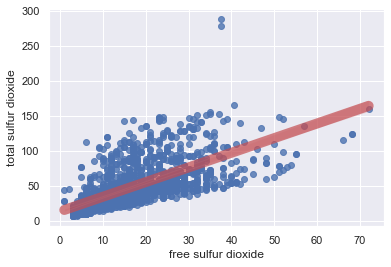

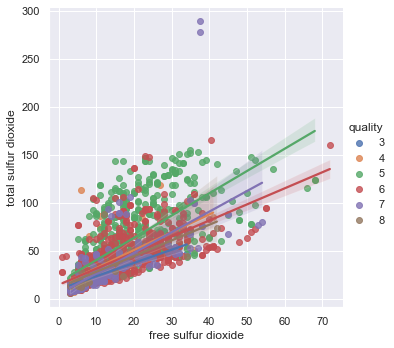

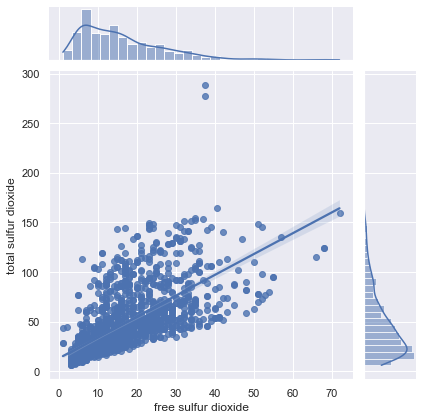

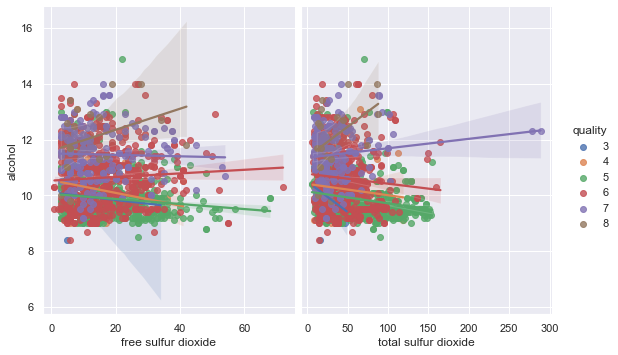

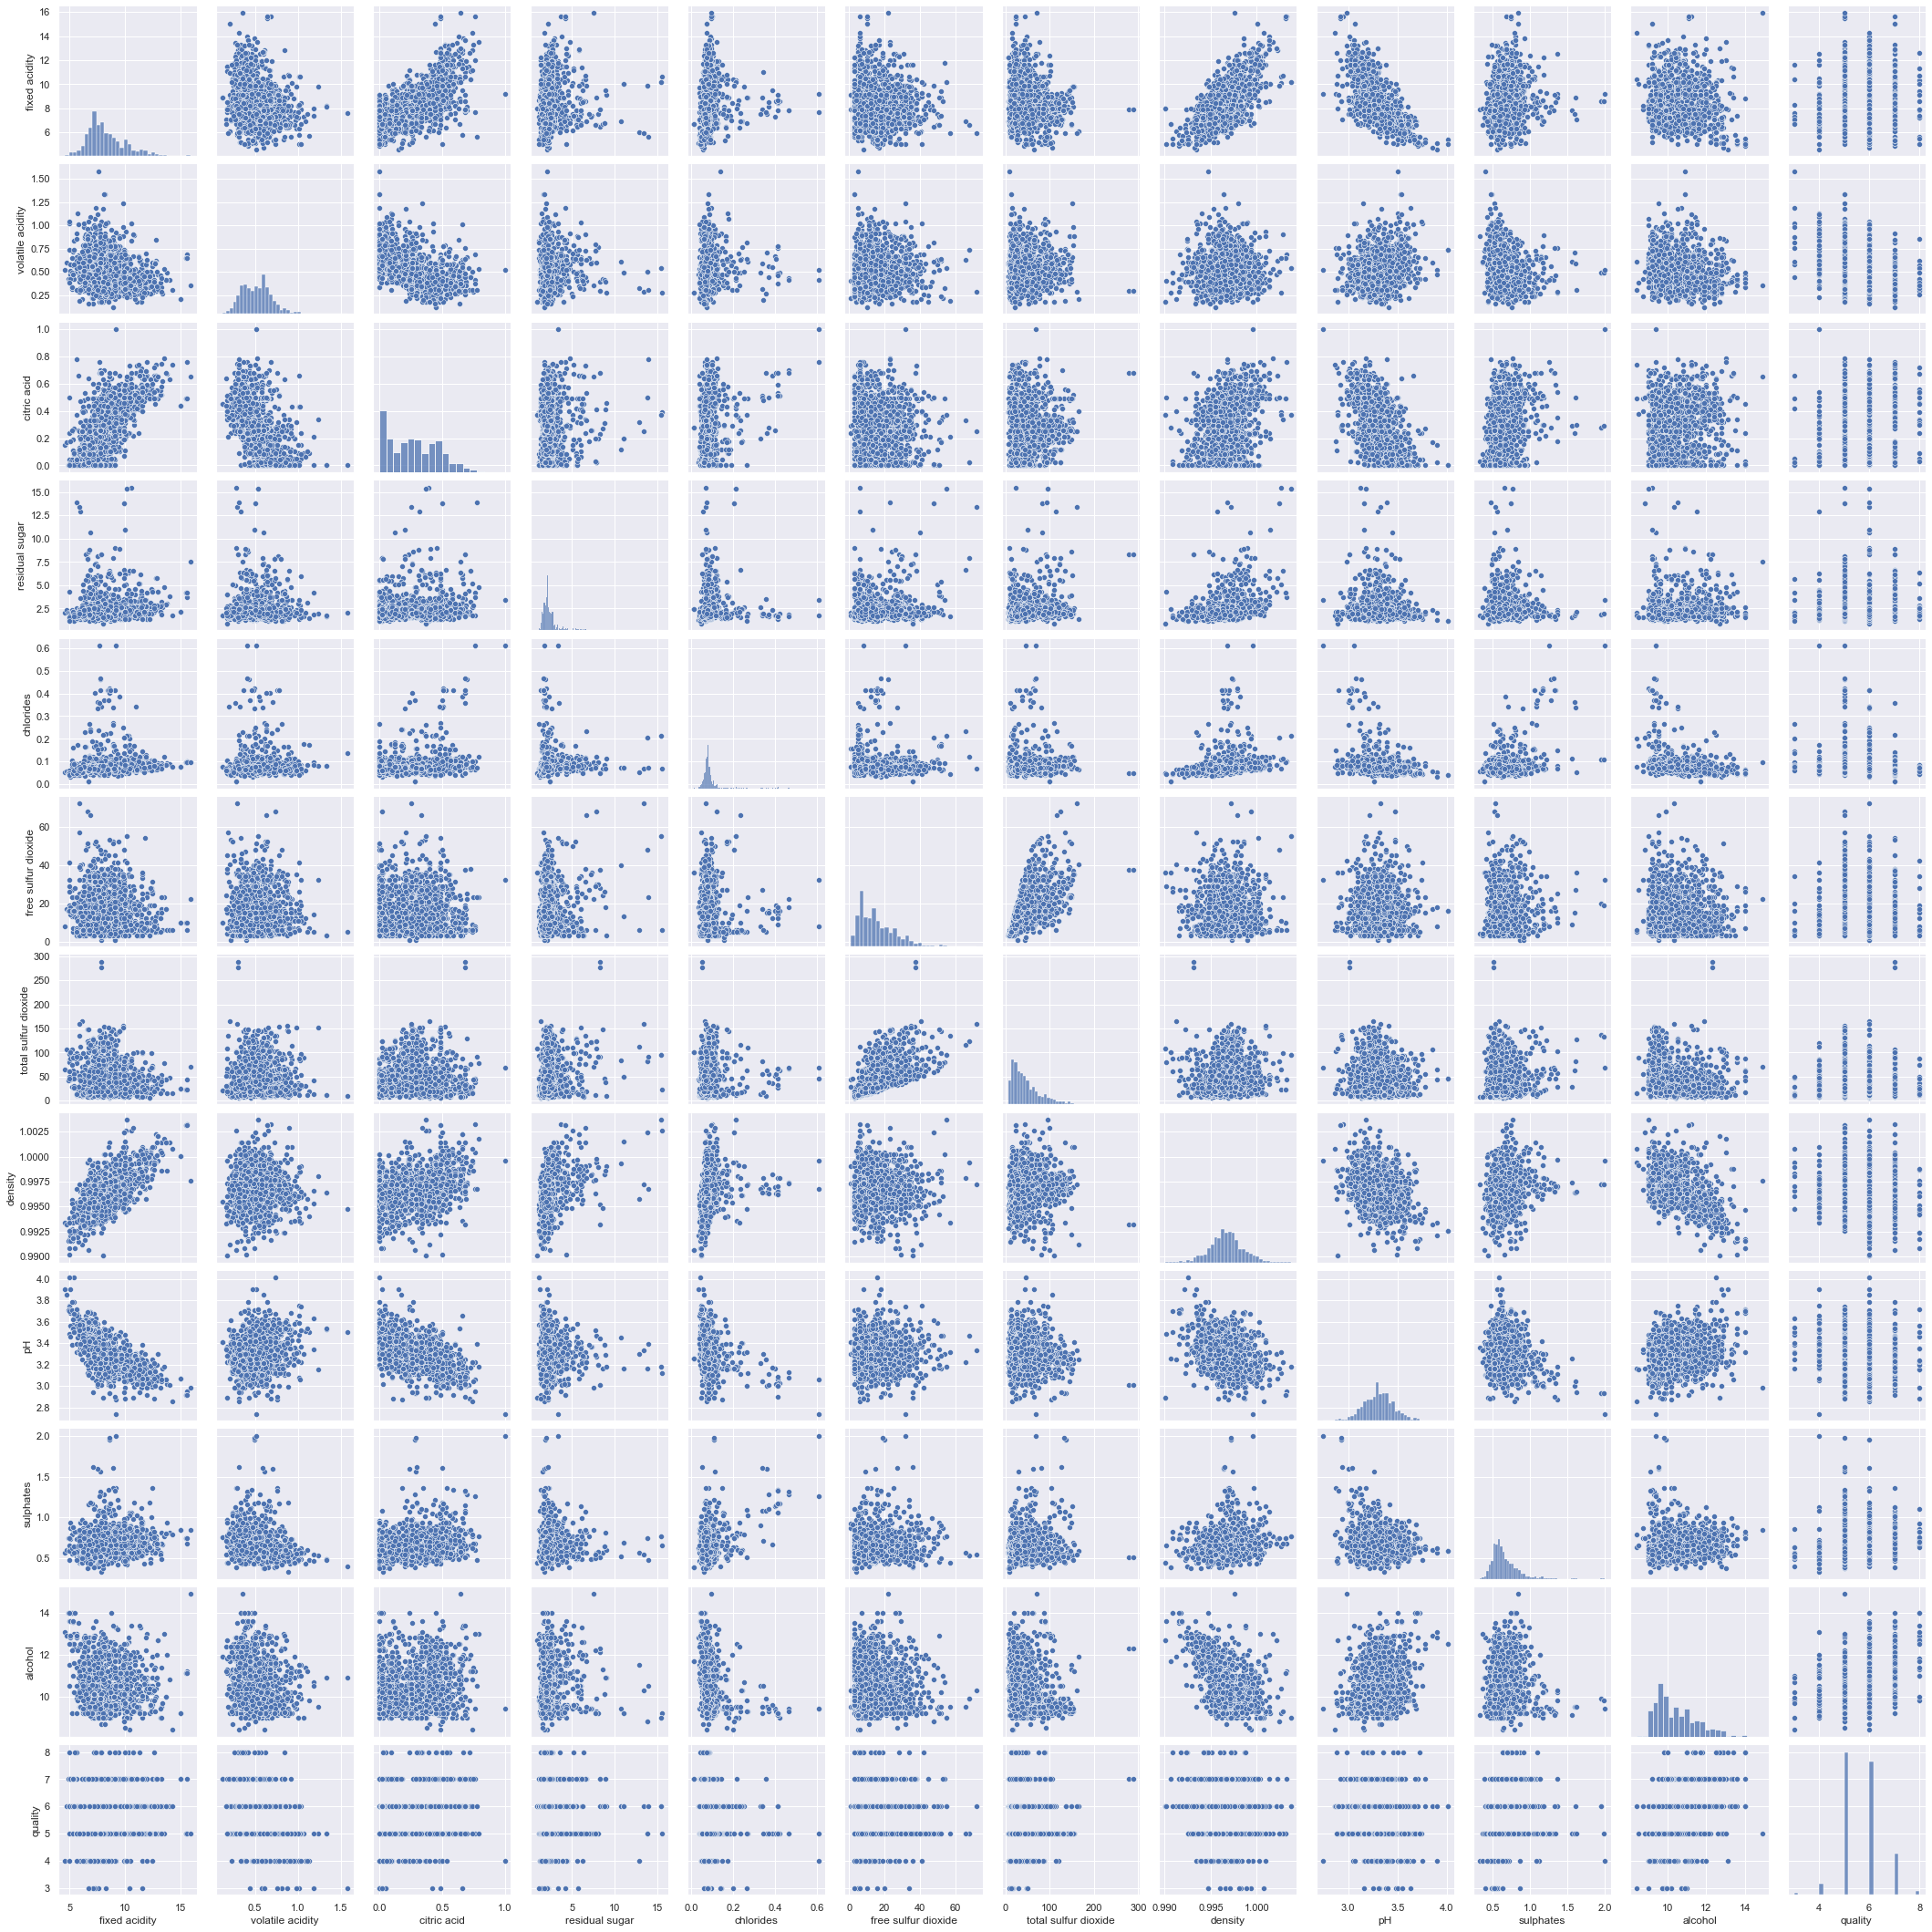

In [13]:
# Scatter plot
sns.regplot(x=wine['free sulfur dioxide'], y=wine['total sulfur dioxide'], line_kws={'color':"r","alpha":0.7,"lw":10})
plt.show()

sns.lmplot(x="free sulfur dioxide", y="total sulfur dioxide", hue="quality", data = wine)
plt.show()

sns.jointplot(x="free sulfur dioxide", y="total sulfur dioxide", data = wine, kind="reg")
plt.show()

sns.pairplot(wine, x_vars=["free sulfur dioxide", "total sulfur dioxide"], y_vars=["alcohol"], hue="quality", height=5, aspect=.8, kind="reg")
sns.pairplot(wine)
plt.show()

<AxesSubplot:>

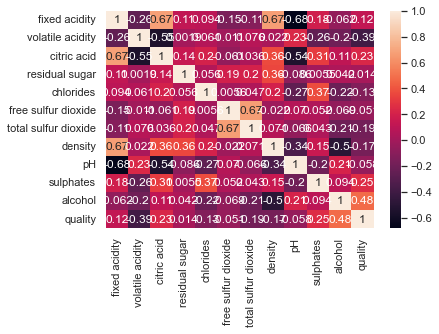

In [14]:
#Correlation
corr = wine.corr()
sns.heatmap(corr, annot=True)

In [15]:
#데이터 준비
X= wine[list(wine.columns)[:-1]]
Y= wine["quality"]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=40)
print(X_train.shape) #(1119, 11)
print(X_test.shape) #(480, 11)
print(X_train.head())

(1119, 11)
(480, 11)
      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
1374            6.8             0.815         0.00             1.2      0.267   
770             7.1             0.590         0.02             2.3      0.082   
552             9.5             0.460         0.24             2.7      0.092   
836             6.7             0.280         0.28             2.4      0.012   
519             7.3             0.365         0.49             2.5      0.088   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
1374                 16.0                  29.0  0.99471  3.32       0.51   
770                  24.0                  94.0  0.99744  3.55       0.53   
552                  14.0                  44.0  0.99800  3.12       0.74   
836                  36.0                 100.0  0.99064  3.26       0.39   
519                  39.0                 106.0  0.99660  3.36       0.78   

      alcohol  
1374      9.8

In [ ]:
# Z 정규화
z_norm =

In [24]:
#Min-Max 정규화
mm_norm = MinMaxScaler()
mm_norm_fit = mm_norm.fit(X_train)
mm_scal_xtrain = mm_norm_fit.transform(X_train)
mm_scal_xtest = mm_norm_fit.transform(X_test)
print(mm_scal_xtrain)

[[0.20183486 0.57438017 0.         ... 0.45669291 0.08588957 0.25      ]
 [0.2293578  0.38842975 0.02       ... 0.63779528 0.09815951 0.23214286]
 [0.44954128 0.28099174 0.24       ... 0.2992126  0.22699387 0.28571429]
 ...
 [0.24770642 0.43801653 0.         ... 0.51181102 0.06134969 0.28571429]
 [0.29357798 0.33884298 0.33       ... 0.44094488 0.14110429 0.19642857]
 [0.40366972 0.39669421 0.29       ... 0.47244094 0.12269939 0.28571429]]


In [17]:
# 모델링
# 클래스 초기화 -> Instance를 만들어 준다.
model_ols = LinearRegression()
# 학습데이터로 모델피팅을 해준다.
model_ols.fit(X_train, Y_train)
# 계수를 출력한다.
coef = model_ols.coef_
intercept = model_ols.intercept_
print("coef=", coef)
print("intercept=", intercept)

coef= [ 5.52394781e-02 -1.00820070e+00 -2.33315386e-01  1.68655558e-02
 -1.75502441e+00  4.72133726e-03 -3.62654130e-03 -2.16629531e+01
 -2.61069037e-01  7.90383899e-01  2.68494823e-01]
intercept= 25.11442926284227


In [18]:
# 예측
Y_pred = model_ols.predict(X_test)
print(Y_pred)

[6.01116656 5.12567184 5.73007777 6.45337924 5.56292187 5.47952656
 5.79206449 6.42503755 5.29238042 5.51950406 5.80403104 5.6716423
 6.10573525 6.61625115 5.26681429 6.20571128 5.85672881 4.88795261
 5.35936835 5.15121245 5.16522798 5.54379639 4.98467465 5.46695524
 6.53527068 5.37633162 5.81250272 5.27680133 5.85487003 5.41046007
 5.33032349 5.53510333 5.29701015 5.11351758 5.12386378 5.56555717
 6.66180042 5.04014077 5.63016215 5.77395807 5.29160715 5.70492771
 5.16097645 5.837696   6.16950071 5.18698524 5.77879118 6.22191728
 6.61327887 5.08016928 6.42503755 5.25360492 4.91440818 6.1456018
 6.05483442 5.07490162 5.75305426 5.66216321 5.95965234 5.36605602
 5.92938845 5.16166748 5.64284232 6.30246941 5.63040138 5.45441546
 5.01485356 5.65980596 6.2151212  6.32266347 5.33108801 5.19876149
 5.21049944 6.28733477 6.08594326 5.06134745 5.1338188  5.55624414
 5.80325863 6.46652837 5.81145573 6.13895436 5.97855431 5.38671867
 5.88644147 5.02035636 5.97403216 5.09874154 5.67063767 5.118459

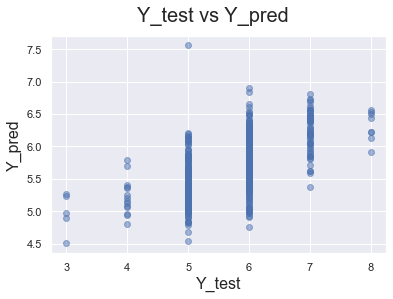

In [19]:
# 예측 시각화
fig = plt.figure()
plt.scatter(Y_test, Y_pred, alpha=0.5)
fig.suptitle("Y_test vs Y_pred", fontsize=20)
plt.xlabel("Y_test", fontsize=16)
plt.ylabel("Y_pred", fontsize=16)
plt.show()

In [20]:
# 성과 측정
print("R^2:", metrics.r2_score(Y_test, Y_pred))
print("RMSE:", np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))
print("MAE:", metrics.mean_absolute_error(Y_test, Y_pred))


R^2: 0.3890060929172722
RMSE: 0.654258159444986
MAE: 0.5062816964649818


In [21]:
# 정규화된 모델링
# 클래스 초기화 -> Instance를 만들어 준다.
model_ols = LinearRegression()
# 학습데이터로 모델피팅을 해준다.
model_ols.fit(scal_xtrain, Y_train)
# 계수를 출력한다.
scal_coef = model_ols.coef_
scal_intercept = model_ols.intercept_
print("scal_coef=", scal_coef)
print("scal_intercept=", scal_intercept)

scal_coef= [ 0.60211031 -1.21992285 -0.23331539  0.24623711 -1.05125962  0.3163296
 -1.02631119 -0.29504942 -0.33155768  1.28832576  1.50357101]
scal_intercept= 5.609257039755549


In [22]:
# 정규화된 예측
Y_pred = model_ols.predict(scal_xtest)
print(Y_pred)

[6.01116656 5.12567184 5.73007777 6.45337924 5.56292187 5.47952656
 5.79206449 6.42503755 5.29238042 5.51950406 5.80403104 5.6716423
 6.10573525 6.61625115 5.26681429 6.20571128 5.85672881 4.88795261
 5.35936835 5.15121245 5.16522798 5.54379639 4.98467465 5.46695524
 6.53527068 5.37633162 5.81250272 5.27680133 5.85487003 5.41046007
 5.33032349 5.53510333 5.29701015 5.11351758 5.12386378 5.56555717
 6.66180042 5.04014077 5.63016215 5.77395807 5.29160715 5.70492771
 5.16097645 5.837696   6.16950071 5.18698524 5.77879118 6.22191728
 6.61327887 5.08016928 6.42503755 5.25360492 4.91440818 6.1456018
 6.05483442 5.07490162 5.75305426 5.66216321 5.95965234 5.36605602
 5.92938845 5.16166748 5.64284232 6.30246941 5.63040138 5.45441546
 5.01485356 5.65980596 6.2151212  6.32266347 5.33108801 5.19876149
 5.21049944 6.28733477 6.08594326 5.06134745 5.1338188  5.55624414
 5.80325863 6.46652837 5.81145573 6.13895436 5.97855431 5.38671867
 5.88644147 5.02035636 5.97403216 5.09874154 5.67063767 5.118459

In [23]:
# 성과 측정
print("R^2:", metrics.r2_score(Y_test, Y_pred))
print("RMSE:", np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))
print("MAE:", metrics.mean_absolute_error(Y_test, Y_pred))

R^2: 0.3890060929172722
RMSE: 0.654258159444986
MAE: 0.5062816964649826
